# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |





# 1. Round-off Error (last class)


# 2. Truncation Error

Truncation error is the error made by   
1) truncating an infinite sum and approximating it by a finite sum   
2) discretization error: error due to taking a finite number for steps instead of an infinite number

##  2.1 Differentiation

Study the trajector of a capsule during its reentry to earth (as in movie "hidden figures"). According to  newton's second
law, 
\begin{equation}
F=m \frac{d {\bf v}}{ dt}
\end{equation}

We need to calculate ${\bf v} = dy(t)/dt $. 
Formally, it is $lim_{h-> 0}\frac{y(t+h)-y(t)}{h}$. But we cannot do it numerically in this way due to the machine precision. We have to take a finite h, which introduces error.

## 2.2 First derivative

### Forward difference:
\begin{equation}
\frac{d y(t)}{dt}_{fw} = \frac{y(t+h)-y(t)}{h}
\end{equation}
Error estimate: using Taylor expansion
\begin{equation}
y(t+h)=y(t)+h*y'(t)+\frac{h^2}{2!}*y''(t)+\frac{h^3}{3!}*y'''(t)+...
\end{equation}
So
\begin{equation}
\frac{d y(t)}{dt}_{fw} = y'(t)+\frac{h}{2!}*y''(t)+\frac{h^2}{3!}*y'''(t)+...
\end{equation}
Error is $\frac{h}{2!}*y''(t)+\frac{h^2}{3!}*y'''(t)+...$, the leading error is O(h).
Draw a picture to show how forward difference works for the capsule's trajectory.

### Central difference:
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}
Draw a figure. 
\begin{equation}
y(t+h/2)=y(t)+h/2*y'(t)+\frac{(h/2)^2}{2!}*y''(t)+\frac{(h/2)^3}{3!}*y'''(t)+\frac{(h/2)^4}{4!}*y^{(4)}(t)+\frac{(h/2)^5}{5!}*y^{(5)}(t)+.... 
\end{equation}
\begin{equation}
y(t-h/2)=y(t)-h/2*y'(t)+\frac{(h/2)^2}{2!}*y''(t)-\frac{(h/2)^3}{3!}*y'''(t)+\frac{(h/2)^4}{4!}*y^{(4)}(t)-\frac{(h/2)^5}{5!}*y^{(5)}(t)+....
\end{equation}
So  
\begin{equation}
\frac{d y(t)}{dt}_{cd} = y'(t) + \frac{h^2}{4*3!}*y'''(t)+\frac{(h^4}{2^4*5!}*y^(5)(t)....
\end{equation}
Error is $O(h^2)$. 

### Extrapolated Difference:
We can extend the method to even higher order accuracy:
\begin{equation}
\frac{d y(t)}{dt}_{cd,1} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}
\begin{equation}
\frac{d y(t)}{dt}_{cd,2} = \frac{y(t+h/4)-y(t-h/4)}{h/2}
\end{equation}
So  
\begin{equation}
\frac{d y(t)}{dt}_{cd,1} = y'(t) + \frac{h^2}{2^3/2*3!}*y'''(t) + \frac{(h^4}{2^5/2*5!}*y^{(5)}(t)....
\end{equation}
\begin{equation}
\frac{d y(t)}{dt}_{cd,2} = y'(t) + \frac{h^2}{4^3/4*3!}*y'''(t) + \frac{(h^4}{4^5/4*5!}*y^{(5)}(t)....
\end{equation}
Then we have
\begin{equation}
\frac{d y(t)}{dt}_{ed} = \frac{4*\frac{d y(t)}{dt}_{cd,2}-\frac{d y(t)}{dt}_{cd,1}}{3}
\end{equation}
So the error is $O(h^4)=-\frac{h^4}{64*120}*y^{(5)}(t)....$

In [26]:
import numpy as np

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    #please write your own central difference scheme

def deried(y,x,dx):
    #please write your own extrapolated difference scheme
    

In [15]:
import numpy as np

x=1.0
dx=0.1
print('forward difference',derifw(np.sin,x,dx))
print('central difference',dericd(np.sin,x,dx))
print('extrapolated difference',deried(np.sin,x,dx))
print('analytical result',np.cos(x))

forward difference 0.4973637525353891
central difference 0.5400772080464311
extrapolated difference 0.540302298833476
analytical result 0.5403023058681398


In [78]:
import numpy as np
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6, -0.5, 0.1):
    y=derifw(np.sin,x,dx)
    print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

dx 1e-06,  y 0.540302
dx 1.25893e-06,  y 0.540302
dx 1.58489e-06,  y 0.540302
dx 1.99526e-06,  y 0.540301
dx 2.51189e-06,  y 0.540301
dx 3.16228e-06,  y 0.540301
dx 3.98107e-06,  y 0.540301
dx 5.01187e-06,  y 0.5403
dx 6.30957e-06,  y 0.5403
dx 7.94328e-06,  y 0.540299
dx 1e-05,  y 0.540298
dx 1.25893e-05,  y 0.540297
dx 1.58489e-05,  y 0.540296
dx 1.99526e-05,  y 0.540294
dx 2.51189e-05,  y 0.540292
dx 3.16228e-05,  y 0.540289
dx 3.98107e-05,  y 0.540286
dx 5.01187e-05,  y 0.540281
dx 6.30957e-05,  y 0.540276
dx 7.94328e-05,  y 0.540269
dx 0.0001,  y 0.54026
dx 0.000125893,  y 0.540249
dx 0.000158489,  y 0.540236
dx 0.000199526,  y 0.540218
dx 0.000251189,  y 0.540197
dx 0.000316228,  y 0.540169
dx 0.000398107,  y 0.540135
dx 0.000501187,  y 0.540091
dx 0.000630957,  y 0.540037
dx 0.000794328,  y 0.539968
dx 0.001,  y 0.539881
dx 0.00125893,  y 0.539772
dx 0.00158489,  y 0.539635
dx 0.00199526,  y 0.539462
dx 0.00251189,  y 0.539245
dx 0.00316228,  y 0.538971
dx 0.00398107,  y 0.53862

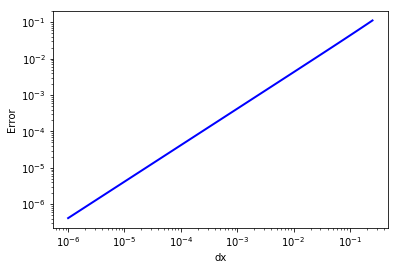

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()


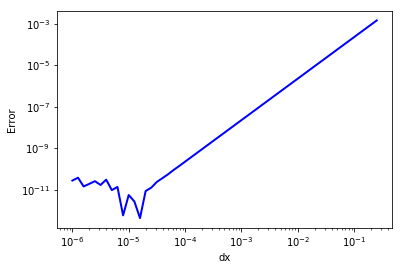

In [81]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6., -0.5, 0.1):
    y=dericd(np.sin,x,dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

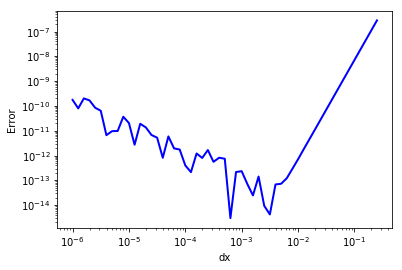

In [83]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6., -0.5, 0.1):
    y=deried(np.sin,x,dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

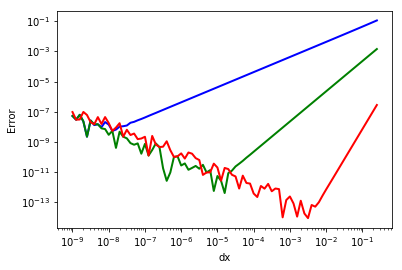

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yfwarr=[]
ycdarr=[]
yedarr=[]
for dx in 10**np.arange(-9., -0.5, 0.1):
    y=derifw(np.sin,x,dx)
    dxarr.append(dx)
    yfwarr.append(y)
    y=dericd(np.sin,x,dx)
    ycdarr.append(y)
    y=deried(np.sin,x,dx)
    yedarr.append(y)
    
plt.plot(dxarr, np.abs(yfwarr-np.cos(1.)), 'b-', lw=2)  
plt.plot(dxarr, np.abs(ycdarr-np.cos(1.)), 'g-', lw=2)  
plt.plot(dxarr, np.abs(yedarr-np.cos(1.)), 'r-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

### Error Assessment

The best results you can get is that the addtion of the round-off error and the truncation error is minimum. Since the truncation error decreases as h becomes small and the round-off error increases as h becomes small (subtraction cancellation), it means that the round-off error roughly equals the truncation error.

The round-off error for the difference is $[y(t+h)-y(t)]/h$, so it is $y\times\epsilon_{machine}/h$.  
The truncation error for forward difference is $y''\times h/2$, for central difference is $y'''\times h^2/24$.


Assume that $y\sim y'\sim y''$ and $\epsilon_{machine}\sim 10^{-15}$, h for forward difference is $4\times 10^{-8}$ and h for central difference is $3\times 10^{-5}$.

**More importantly**, the limiting error for the forward difference is  $3\times 10^{-8}$ and for the central difference is $3\times 10^{-11}$. 

**A higher order scheme gets a more accurate result with a bigger interval. Win-Win**

## 2.3 second derivative

Do central difference twice. 
\begin{equation}
y''(t)=\frac{y'(t+h/2)-y'(t-h/2)}{h}=\frac{[y(t+h)-y(t)]-[y(t)-y(t-h)]}{h^2}=\frac{y(t+h)+y(t-h)-2y(t)}{h^2}
\end{equation}

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# forward difference for the first derivative and central difference for the second derivative
def dersecond1(y,x,dx):
        return (y(x+3.*dx/2.)-y(x+dx/2.)-(y(x+dx/2.)-y(x-dx/2.)))/dx/dx
    

# = central difference for both derivatives
def dersecond2(y,x,dx):
        return (y(x+dx)+y(x-dx)-2.*y(x))/dx/dx

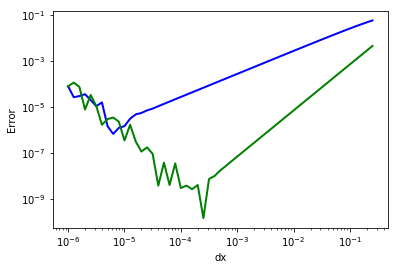

In [30]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr1=[]
yarr2=[]

for dx in 10**np.arange(-6., -0.5, 0.1):
    y=dersecond1(np.sin,x,dx)
    dxarr.append(dx)
    yarr1.append(y)
    y=dersecond2(np.sin,x,dx)
    yarr2.append(y)
    
    
plt.plot(dxarr, np.abs(yarr1+np.sin(1.)), 'b-', lw=2)  
plt.plot(dxarr, np.abs(yarr2+np.sin(1.)), 'g-', lw=2)  
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()